## Imports and read data


In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
 

## Defining features and dropna


In [2]:
df = pd.read_csv("../data/clean_reclean/ordinal_numerized_cleaned.csv")

# Define features
main_features = [
    'KitchenQual_code',
    'GarageFinish_code',
    'BsmtQual_code',
    'ExterQual_code',
    'BsmtExposure_code'
]

interactions = [
    'ExterQual_code:KitchenQual_code',
    'BsmtQual_code:BsmtExposure_code'
]

# Drop rows with missing values
df = df.dropna(subset=main_features + ['SalePrice'])


## 1. Full model with interactions


In [3]:
full_formula = 'SalePrice ~ ' + ' + '.join(main_features + interactions)
model_full = ols(full_formula, data=df).fit()


# 2. Reduced model (main effects only)


In [4]:
reduced_formula = 'SalePrice ~ ' + ' + '.join(main_features)
model_reduced = ols(reduced_formula, data=df).fit()


# 3. Compare models using ANOVA


In [5]:
anova_compare = sm.stats.anova_lm(model_reduced, model_full)
print("ANOVA Comparison (Main effects vs Interactions):\n")
print(anova_compare)

ANOVA Comparison (Main effects vs Interactions):

   df_resid           ssr  df_diff       ss_diff        F        Pr(>F)
0    1454.0  3.673319e+12      0.0           NaN      NaN           NaN
1    1452.0  3.326602e+12      2.0  3.467167e+11  75.6677  5.496201e-32


# 4. Summary of the full model


In [6]:
print("\nFull Regression Model Summary:\n")
print(model_full.summary())



Full Regression Model Summary:

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     366.7
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.38e-315
Time:                        12:18:34   Log-Likelihood:                -17801.
No. Observations:                1460   AIC:                         3.562e+04
Df Residuals:                    1452   BIC:                         3.566e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# 5. Residual plot


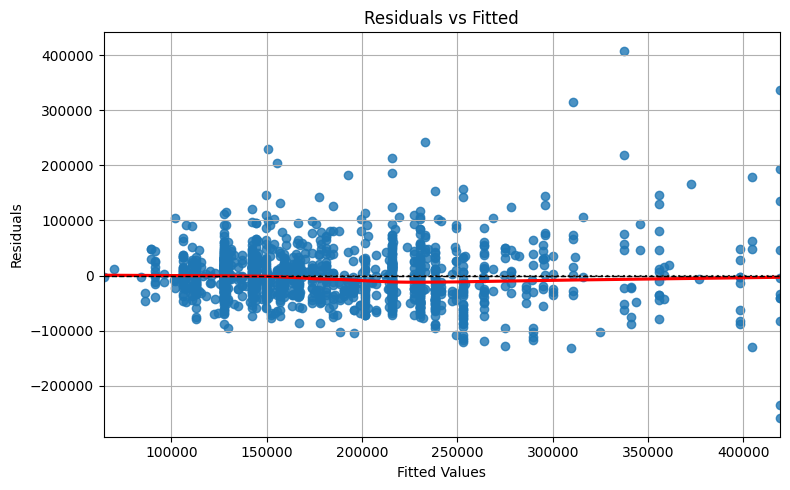

In [7]:
residuals = model_full.resid
fitted = model_full.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# ANOVA analysis for the full model
anova_full = sm.stats.anova_lm(model_full, typ=2)
print("\nANOVA Analysis for Full Model:\n")
print(anova_full)



ANOVA Analysis for Full Model:

                                       sum_sq      df           F  \
KitchenQual_code                 2.564404e+11     1.0  111.931493   
GarageFinish_code                1.631034e+11     1.0   71.191596   
BsmtQual_code                    1.179003e+11     1.0   51.461285   
ExterQual_code                   2.015414e+11     1.0   87.969061   
BsmtExposure_code                1.153368e+11     1.0   50.342375   
ExterQual_code:KitchenQual_code  1.465160e+11     1.0   63.951506   
BsmtQual_code:BsmtExposure_code  1.323412e+11     1.0   57.764457   
Residual                         3.326602e+12  1452.0         NaN   

                                       PR(>F)  
KitchenQual_code                 2.988256e-25  
GarageFinish_code                7.729010e-17  
BsmtQual_code                    1.159910e-12  
ExterQual_code                   2.464506e-20  
BsmtExposure_code                2.011890e-12  
ExterQual_code:KitchenQual_code  2.582218e-15  
BsmtQual_